In [168]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from sklearn.decomposition import PCA, SparsePCA
import re
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

pd.set_option('max_columns',None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

def processing(img,height=int,width=int):
    dim = (width,height)
    size =  cv2.resize(img,dim, interpolation=cv2.INTER_LINEAR)
    norm = np.zeros((100, 100))
    norm_img = cv2.normalize(size, norm, 0, 100, cv2.NORM_MINMAX)
    
    return  norm_img

def get_images():
    df = pd.DataFrame(columns=['App','original_image','blue_channel','green_channel','red_channel'])

    app_images = [x for x in os.listdir(('/Users/agustinferreira/Desktop/finalproyect-stats/data/images')) if str(x) != '.DS_Store']

    for image in app_images:
        try: 
            
            crude  = np.asarray(cv2.cvtColor(cv2.imread(f'/Users/agustinferreira/Desktop/finalproyect-stats/data/images/{image}'), cv2.COLOR_BGR2RGB)) #transforming image to array and RGB color scale
            processed_img = processing(crude,100,100) #resizing and normalizing image
            blue_channel,green_channel,red_channel = cv2.split(processed_img)
        except IOError:
            pass
        image_name = image[:-4]
        df = df.append({'App' : image_name, 'original_image':processed_img, 'blue_channel':blue_channel, 'green_channel':green_channel,'red_channel':red_channel} , ignore_index=True)
    return df

app_data = pd.read_csv('/Users/agustinferreira/Desktop/finalproyect-stats/data/app_sample.csv')

app_images = get_images()

In [169]:
app_data.describe(percentiles = [0.25,0.4,0.75])

,Unnamed: 0,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,10000.00000,9920.00000,9920.00000,10000.00000,10000.00000,10000.00000
mean,1161779.83750,2.22608,1699.17722,296232.58560,429234.57890,0.08250
std,672672.86589,2.10919,29078.31791,14204789.27489,18371075.63620,1.10374
min,51.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,577280.00000,0.00000,0.00000,50.00000,84.00000,0.00000
40%,933511.40000,0.00000,0.00000,100.00000,308.60000,0.00000
50%,1170674.50000,3.00000,6.00000,500.00000,700.50000,0.00000
75%,1739240.00000,4.30000,40.00000,5000.00000,7253.00000,0.00000
max,2312533.00000,5.00000,1953804.00000,1000000000.00000,1494252350.00000,60.00000


In [170]:
app_data_300 = app_data[app_data['Maximum Installs']>300]

In [171]:
app_data_300.describe()

,Unnamed: 0,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,6035.00000,6010.00000,6010.00000,6035.00000,6035.00000,6035.00000
mean,1160910.46993,3.29466,2803.73295,490827.92046,711188.47490,0.04590
std,674503.03430,1.69080,37318.13530,18283038.93955,23644620.16347,0.49184
min,51.00000,0.00000,0.00000,100.00000,301.00000,0.00000
25%,576266.50000,3.00000,7.00000,1000.00000,1045.00000,0.00000
50%,1164998.00000,4.00000,24.00000,1000.00000,4240.00000,0.00000
75%,1745672.00000,4.40000,138.00000,10000.00000,27031.50000,0.00000
max,2312527.00000,5.00000,1953804.00000,1000000000.00000,1494252350.00000,13.99000


In [172]:
app_data_final = app_data_300[app_data_300['Rating Count']> 100]


In [173]:
app_data_final[app_data_final['Category']== 'Board'].head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1838,631825,Gomoku Board - play with your friend & A.I.,com.khgkjg12.gomoku,Board,3.10000,336.00000,"100,000+",100000.00000,270622,True,0.00000,USD,Varies with device,4.1 and up,khgkjg12,https://khgkjg12.blogspot.com/,khgkjg12dev@gmail.com,"Sep 12, 2018","Jul 27, 2019",Everyone,https://khgkjg12dev.blogspot.com/2018/09/blog-...,True,False,False,2021-06-16 06:34:21
2172,554861,Monsters & Generators for D&D,com.manzo.encountergenerator,Board,4.30000,1373.00000,"100,000+",100000.00000,259213,True,0.00000,USD,5.4M,4.0.3 and up,Manolo D'antonio,NaN,manolodantonio@gmail.com,"Mar 8, 2018","Oct 09, 2019",Everyone,https://goo.gl/Nf4gH6,False,False,False,2021-06-16 05:24:32
6104,340267,Mahjong Titans,com.mirenad.mahjongtitans,Board,4.40000,5230.00000,"1,000,000+",1000000.00000,1091116,True,0.00000,USD,Varies with device,Varies with device,Mirenad,http://mirenad.com,public.mirenad@hotmail.com,"Jul 30, 2014","Apr 14, 2019",Everyone,NaN,False,False,False,2021-06-16 02:08:30
9070,2286288,Bingo - Pharaoh's Way,com.starlight.BingoPharaoh,Board,4.40000,7357.00000,"500,000+",500000.00000,604123,True,0.00000,USD,44M,4.1 and up,Starlight Interactive,http://starlight-interactive.blogspot.kr/,camack777@gmail.com,"Dec 8, 2013","Jan 14, 2020",Teen,https://starlight-interactive.blogspot.com,True,True,False,2021-06-16 12:35:49


In [174]:
app_data_final['Big_Category2'] = ['Tools' if i in ['Tools','Communication','Productivity', 'Parenting', 'Maps & Navigation', 'Video Players & Editors', 'Weather', 'House & Home' , 'Personalization' ] 
else 'Games' if i in ['Puzzle', 'Arcade', 'Card', 'Action', 'Simulation', 'Adventure','Racing', 'Role Playing', 'Casino', 'Word','Strategy','Casual','Libraries & Demo', 'Board'] 
else 'Education' if i in ['Education', 'Educational'] 
else  'Business' if i in ['Finance', 'Business'] 
else 'Entertainment' if i in ['Entertainment', 'Music & Audio','Books & Reference', 'Photography', 'News & Magazines', 'Sports', 'Shopping', 'Food & Drink', 'Dating', 'Music', 'Comics' , 'Art & Design'] 
else 'Lifestyle' for i in app_data_final['Category']]


/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/1904140728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data_final['Big_Category2'] = ['Tools' if i in ['Tools','Communication','Productivity', 'Parenting', 'Maps & Navigation', 'Video Players & Editors', 'Weather', 'House & Home' , 'Personalization' ]


In [175]:
app_data_final['Big_Category2'].value_counts()

Entertainment    501
Tools            371
Games            358
Lifestyle        232
Education        153
Business         112
Name: Big_Category2, dtype: int64

In [176]:
data = app_data_final

In [177]:
### Handling Size of the app 
data['Size'].value_counts()
data['size_number']=[np.nan if len(re.findall(r'\d*\.?\d+',i))==0 else float(re.findall(r'\d*\.?\d+',i)[0]) for i in data['Size']]
data['size_units']=[np.nan if len(re.findall(r'\d*\.?\d+',i))==0 else re.findall(r'[a-zA-Z]+',i)[0] for i in data['Size']]
data['size_norm']=[i*0.001 if j=='k' else i for i,j in zip(data['size_number'],data['size_units'])]

### Handling the version of the app 
data['version']=[np.nan if i!=i else np.nan if len(re.findall(r'\d*\.?\d+',i))==0 else float(re.findall(r'\d*\.?\d+',i)[0]) for i in data['Minimum Android']]  


/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/772812193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size_number']=[np.nan if len(re.findall(r'\d*\.?\d+',i))==0 else float(re.findall(r'\d*\.?\d+',i)[0]) for i in data['Size']]
/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/772812193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size_units']=[np.nan if len(re.findall(r'\d*\.?\d+',i))==0 else re.findall(r'[a-zA-Z]+',i)[0] for i in data['Size']]
/var

In [178]:
### Calculating Time Variables 
### Parsing string to dates
data['Released_1']=[np.nan if i!=i else parse(i) for i in data['Released']]
data['Last_Updated_1']=[np.nan if i!=i else parse(i) for i in data['Last Updated']]
data['Scraped_Time_1']=[np.nan if i!=i else parse(i) for i in data['Scraped Time']]
### days since realise 
data['time_realise']=[(i-j).days for i,j in zip(data['Scraped_Time_1'],data['Released_1'])]
### days since last update 
data['time_updated']=[(i-j).days for i,j in zip(data['Scraped_Time_1'],data['Last_Updated_1'])]
### days from realise to last update 
data['time_realise_update']=[-(i-j) for i,j in zip(data['time_updated'],data['time_realise'])]

### Drop auxiliar variables
data=data.drop(['Unnamed: 0','Installs','Minimum Installs','Currency','Size','Minimum Android','Released','Last Updated','Scraped Time','size_units','size_number','Released_1','Last_Updated_1','Scraped_Time_1'],axis=1)

/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/1913077987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Released_1']=[np.nan if i!=i else parse(i) for i in data['Released']]
/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/1913077987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Last_Updated_1']=[np.nan if i!=i else parse(i) for i in data['Last Updated']]
/var/folders/9w/hcnt4bcn71v5lrq56ddjlqt00000gn/T/ipykernel_23284/1913077987.py:5: SettingWithCop

In [179]:
### Continuos Variables
cont=['Rating','Rating Count','Maximum Installs','Price','size_norm','version','time_realise','time_updated','time_realise_update']
cat=['Category','Free','Content Rating','Ad Supported','In App Purchases','Editors Choice','Big_Category2']
keys=['App Name','App Id','Developer Id','Developer Website','Developer Email','Privacy Policy']

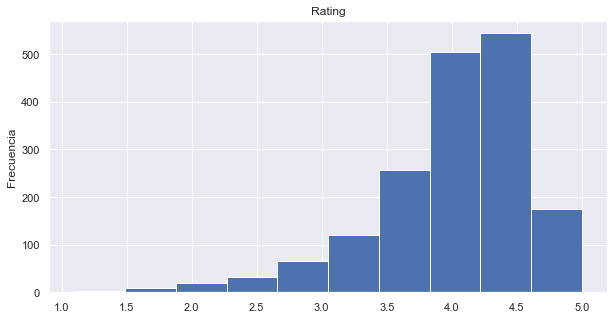

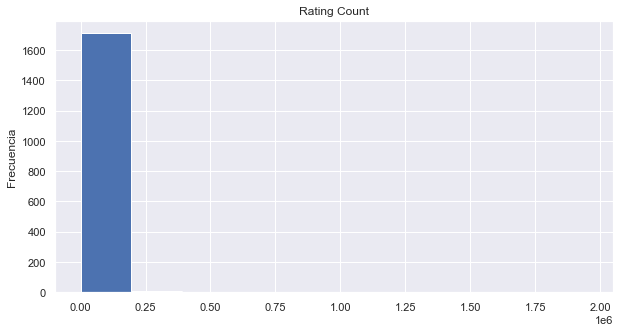

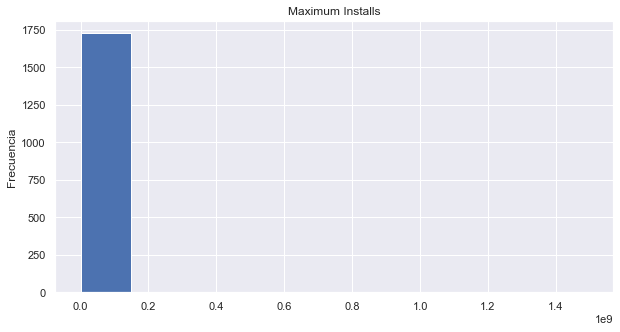

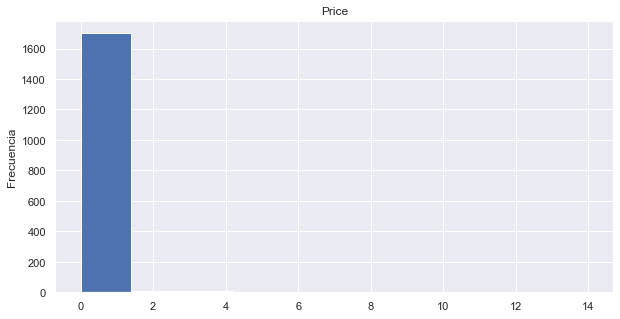

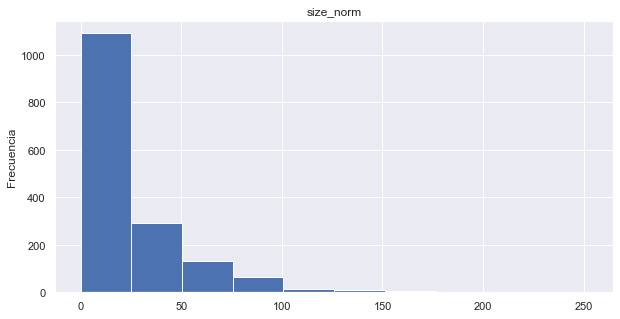

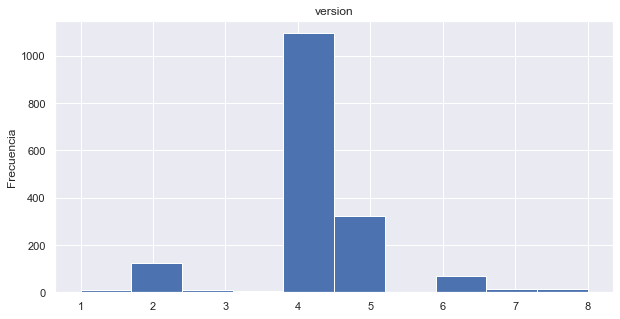

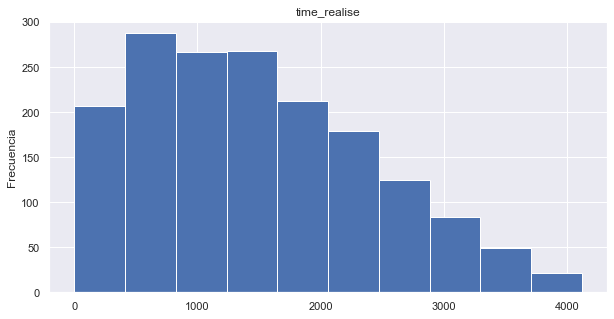

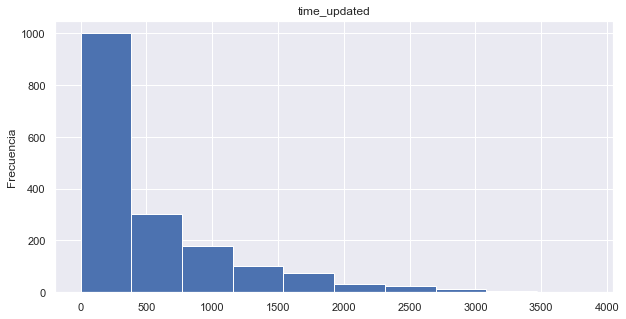

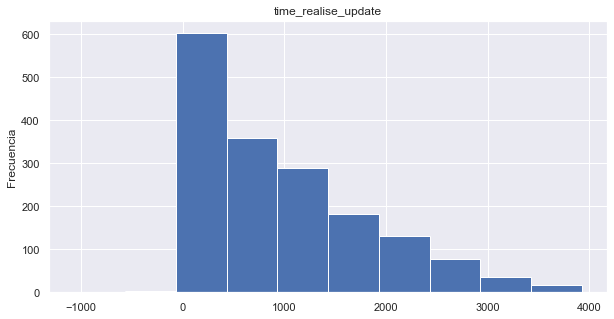

In [180]:
## Univariate Visualization
for i in cont:
  sns.set(rc = {'figure.figsize':(10,5)})
  data[i].hist()
  plt.title(i)
  plt.ylabel('Frecuencia')
  plt.show()

In [181]:
### Barcharts : 
#for i in cat: 
#  aux=data.groupby([i])['App Name'].count().reset_index()
#  sns.barplot(x=aux[i],y=aux['App Name'])
#  plt.title(i)
#  plt.xlabel(i)
#  plt.ylabel('# Of Apps')
#  plt.xticks(rotation=90)
#  plt.show()

In [182]:
### Univariate Visualization
#for i in cont:
#  sns.boxplot(x=data[i])
#  plt.title(i)
#  plt.xlabel(i)
#  plt.show()

In [183]:
### Barcharts : 
#for i in cat: 
#  aux=data.groupby([i])['App Name'].count().reset_index()
#  sns.barplot(x=aux[i],y=aux['App Name'])
#  plt.title(i)
#  plt.xlabel(i)
#  plt.ylabel('# Of Apps')
#  plt.xticks(rotation=90)
#  plt.show()

In [184]:
### Crossed Visualization 
### boxplots for contiuos variables open by categories 
#for i in cont:
#  for j in cat:
#    if j=='Category':
#      sns.set(rc = {'figure.figsize':(7,16)})
#    else: 
#      sns.set(rc = {'figure.figsize':(7,7)})
#    sns.boxplot(x=data[i],y=data[j].astype(str))
#    plt.title(i)
#    plt.xlabel(i)
#    plt.show()

In [185]:
#for i in cont:
#  for j in cont:
#    if i!=j:
#      sns.set(rc = {'figure.figsize':(7,7)})
#      sns.scatterplot(x=data[i], y=data[j])
#      plt.title(i+' vs '+j)
#      plt.show()

In [186]:
# one hot encoding for categorical Variables
data = pd.get_dummies(data, prefix=cat, columns=cat, drop_first = True)## the prefix is how to name the dummies
# Drop Keys
app_list = data['App Name'].reset_index(drop=True)
data=data.drop(keys,axis=1)

In [187]:
### Fill nulls with the mean
# Report na
# Compute nulls per feature
Nulls = data.isnull().sum()
print(Nulls)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')


data_clean = pd.DataFrame(imp_mean.fit_transform(data))
data_clean.columns=data.columns

Rating                           0
Rating Count                     0
Maximum Installs                 0
Price                            0
size_norm                      117
                              ... 
Big_Category2_Education          0
Big_Category2_Entertainment      0
Big_Category2_Games              0
Big_Category2_Lifestyle          0
Big_Category2_Tools              0
Length: 67, dtype: int64


In [188]:
data_clean['App Name'] = app_list

In [189]:
data_complete = data_clean.merge(app_images,how='left', left_on='App Name', right_on='App')
#data_complete.drop(['Unnamed: 0'], axis = 1, inplace = True)

#Scale the colors to take values between 0-1.
data_complete['red_channel_scaled'] = data_complete['red_channel']/100
data_complete['blue_channel_scaled'] = data_complete['blue_channel']/100
data_complete['green_channel_scaled'] = data_complete['green_channel']/100

In [190]:
data_complete.dropna(inplace=True)
data_complete.reset_index(inplace=True, drop=True)

In [191]:
data_complete[data_complete['App Name']=='Mario Kart Tour']

,Rating,Rating Count,Maximum Installs,Price,size_norm,version,time_realise,time_updated,time_realise_update,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Educational,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free_True,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Ad Supported_True,In App Purchases_True,Editors Choice_True,Big_Category2_Education,Big_Category2_Entertainment,Big_Category2_Games,Big_Category2_Lifestyle,Big_Category2_Tools,App Name,App,original_image,blue_channel,green_channel,red_channel,red_channel_scaled,blue_channel_scaled,green_channel_scaled
1009,4.10000,1953804.00000,91722312.00000,0.00000,129.00000,4.40000,630.00000,27.00000,603.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Mario Kart Tour,Mario Kart Tour,"[[[61, 85, 96], [59, 84, 96], [59, 84, 96], [6...","[[61, 59, 59, 63, 60, 59, 60, 64, 59, 59, 61, ...","[[85, 84, 84, 85, 84, 84, 84, 85, 84, 84, 85, ...","[[96, 96, 96, 97, 96, 96, 96, 96, 96, 96, 96, ...","[[0.96, 0.96, 0.96, 0.97, 0.96, 0.96, 0.96, 0....","[[0.61, 0.59, 0.59, 0.63, 0.6, 0.59, 0.6, 0.64...","[[0.85, 0.84, 0.84, 0.85, 0.84, 0.84, 0.84, 0...."


In [192]:
#Plot image decomposition in RGB filtering

def plot_img_decomposition(figureindex:int=1):
    
    fig = plt.figure(figsize = (15, 7.2))
    fig.add_subplot(141)
    plt.title("Original Image")
    plt.imshow(Image.fromarray(data_complete.iloc[figureindex,69]))
    fig.add_subplot(142)
    plt.title("Blue Channel")
    plt.imshow(Image.fromarray(data_complete.iloc[figureindex,70]))
    fig.add_subplot(143)
    plt.title("Green Channel")
    plt.imshow(Image.fromarray(data_complete.iloc[figureindex,71]))
    fig.add_subplot(144)
    plt.title("Red Channel")
    plt.imshow(Image.fromarray(data_complete.iloc[figureindex,72]))
    return plt.show(fig)

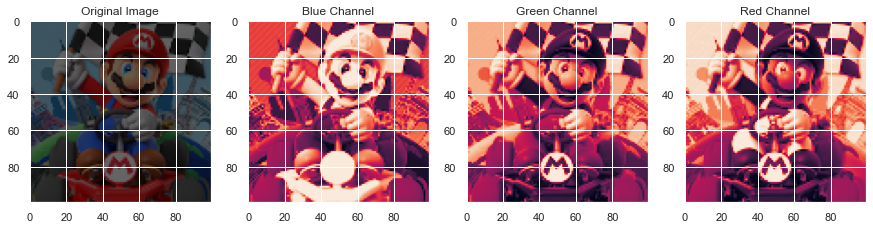

In [193]:
plot_img_decomposition(1009)

In [194]:
def apply_pca(dataframe, n_components:int):

    list_blue = []
    list_green = []
    list_red = []
    expvar_blue = []
    expvar_green = []
    expvar_red = []

    for i in range(dataframe.shape[0]):
        pca_red = PCA(n_components=n_components)
        pca_red.fit(dataframe['blue_channel_scaled'][i])
        list_red.append(pca_red.transform(dataframe['red_channel_scaled'][i]))
        expvar_red.append(sum(pca_red.explained_variance_ratio_))

        pca_blue = PCA(n_components=n_components)
        pca_blue.fit(dataframe['blue_channel_scaled'][i])
        list_blue.append(pca_blue.transform(dataframe['blue_channel_scaled'][i]))
        expvar_blue.append(sum(pca_blue.explained_variance_ratio_))

        pca_green = PCA(n_components=n_components)
        pca_green.fit(dataframe['blue_channel_scaled'][i])
        list_green.append(pca_green.transform(dataframe['green_channel_scaled'][i]))
        expvar_green.append(sum(pca_green.explained_variance_ratio_))

    dataframe['blue_channel_PCA'] = list_blue
    dataframe['green_channel_PCA'] = list_green
    dataframe['red_channel_PCA'] = list_red


    return dataframe,expvar_red,expvar_green,expvar_blue,pca_red,pca_green,pca_blue

In [195]:
data_w_pca10,red_pca_expvar10,green_pca_expvar10,blue_pca_expvar10,a,b,c = apply_pca(data_complete, n_components=10)
data_w_pca30,red_pca_expvar30,green_pca_expvar30,blue_pca_expvar30,d,e,f = apply_pca(data_complete, n_components=30)
data_w_pca20,red_pca_expvar20,green_pca_expvar20,blue_pca_expvar20,pca_red,pca_green,pca_blue = apply_pca(data_complete, n_components=20)

/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/agustinferreira/Desktop/f

In [196]:
#dictionary = {}
#for i in range(1,101):
#    data_w_pca,red_pca_expvar,green_pca_expvar,blue_pca_expvar,a,b,c = apply_pca(data_complete, n_components=i)
#    dictionary[f'data_w_pca{i}'] = data_w_pca
#    dictionary[f'red_pca_expvar{i}'] = red_pca_expvar
#    dictionary[f'green_pca_expvar{i}'] = green_pca_expvar
#    dictionary[f'blue_pca_expvar{i}'] = blue_pca_expvar

In [197]:
var_dict={'red_pca_expvar10':red_pca_expvar10, 'green_pca_expvar10':green_pca_expvar10, 'blue_pca_expvar10':blue_pca_expvar10, 
'red_pca_expvar20':red_pca_expvar20,'green_pca_expvar20':green_pca_expvar20,'blue_pca_expvar20':blue_pca_expvar20,
'red_pca_expvar30':red_pca_expvar30,'green_pca_expvar30':green_pca_expvar30,'blue_pca_expvar30':blue_pca_expvar30}

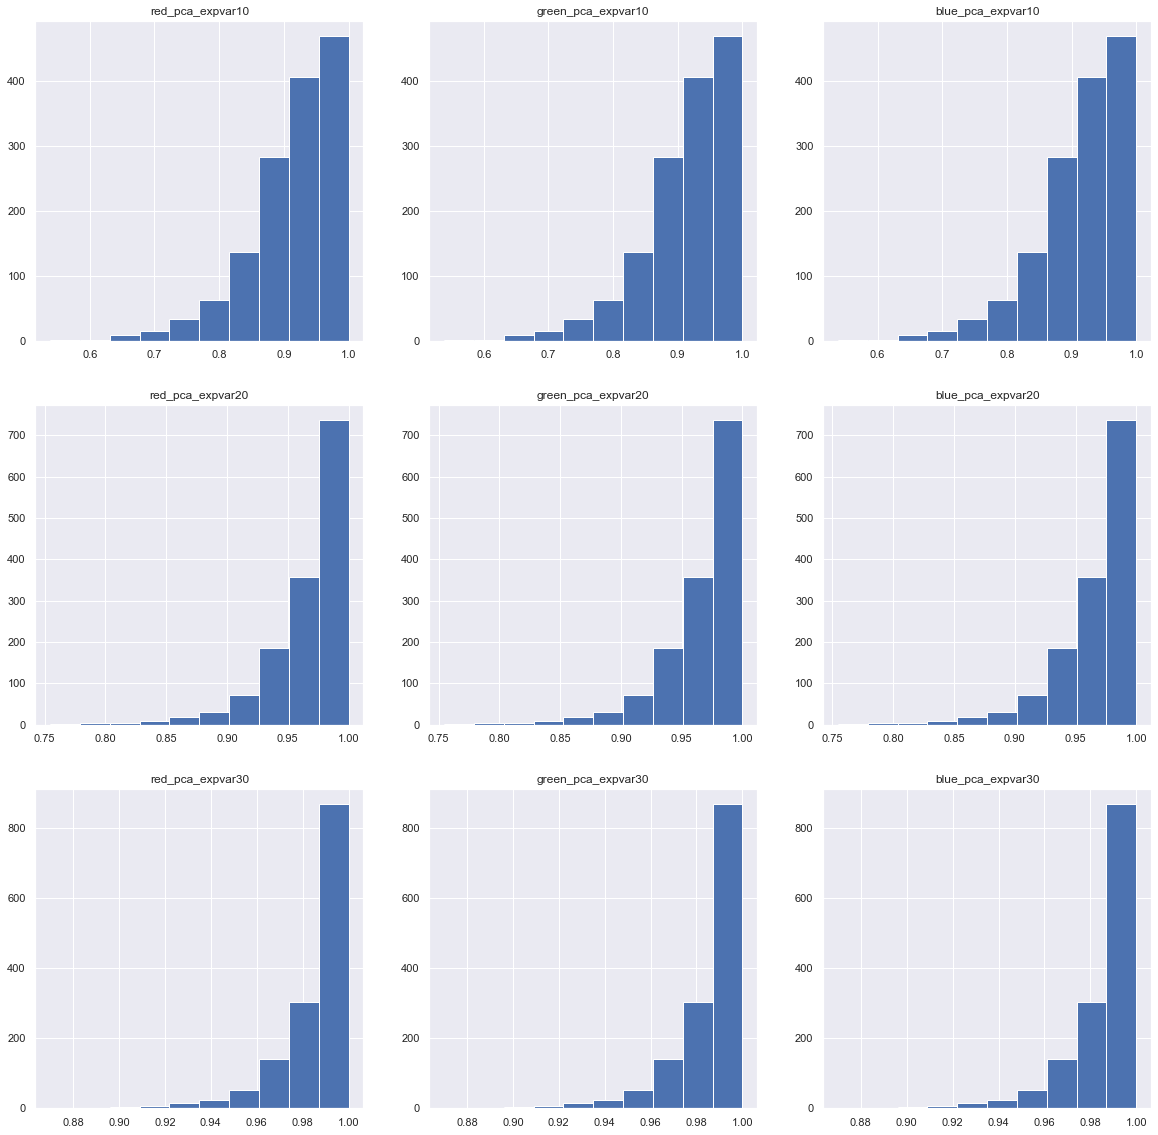

In [198]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(20,20)
for i in range(3):
    for j,color in enumerate(['red','green','blue']):
        plot = (i+1)*10
        aux=f'{color}_pca_expvar{plot}'
        axs[i, j].hist(pd.Series(var_dict.get(aux)))
        axs[i, j].set_title(aux)

In [199]:
b_arr = pca_blue.inverse_transform(data_w_pca20['blue_channel_PCA'][1424])
g_arr = pca_green.inverse_transform(data_w_pca20['green_channel_PCA'][1424])
r_arr = pca_red.inverse_transform(data_w_pca20['red_channel_PCA'][1424])

img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(100, 100, 3)


In [200]:
def plot_pca(i:int):

    fig = plt.figure(figsize = (15, 7.2))
        
    fig.add_subplot(121)
    plt.title("Original Image")
    plt.imshow(Image.fromarray(data_complete.iloc[i,69]))
    
    fig.add_subplot(122)
    plt.title("PCA Image")
    b_arr = pca_blue.inverse_transform(data_w_pca20['blue_channel_PCA'][i])
    g_arr = pca_green.inverse_transform(data_w_pca20['green_channel_PCA'][i])
    r_arr = pca_red.inverse_transform(data_w_pca20['red_channel_PCA'][i])

    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
    plt.imshow(img_reduced)
    
    return plt.show(fig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


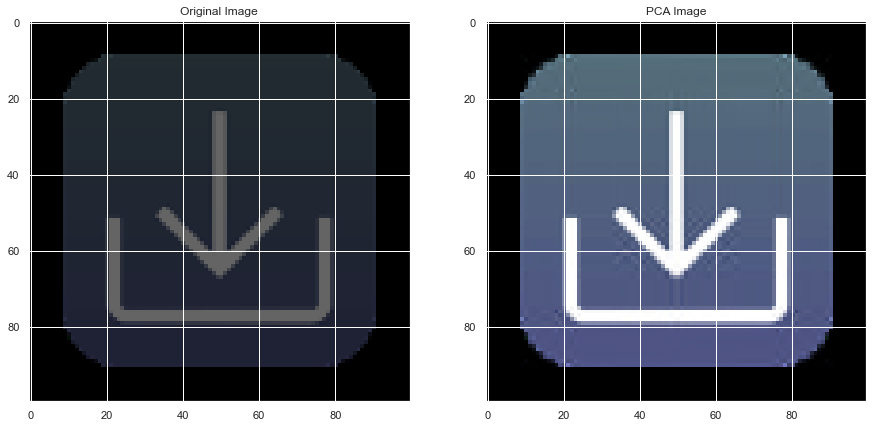

In [201]:
plot_pca(1424)

In [202]:
data_w_pca20.head()

,Rating,Rating Count,Maximum Installs,Price,size_norm,version,time_realise,time_updated,time_realise_update,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Educational,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free_True,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Ad Supported_True,In App Purchases_True,Editors Choice_True,Big_Category2_Education,Big_Category2_Entertainment,Big_Category2_Games,Big_Category2_Lifestyle,Big_Category2_Tools,App Name,App,original_image,blue_channel,green_channel,red_channel,red_channel_scaled,blue_channel_scaled,green_channel_scaled,blue_channel_PCA,green_channel_PCA,red_channel_PCA
0,3.70000,1515.00000,312649.00000,0.00000,24.00000,5.00000,1842.00000,2.00000,1840.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,Flexiroam X,Flexiroam X,"[[[87, 15, 15], [87, 15, 15], [87, 15, 15], [8...","[[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, ...","[[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...","[[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...","[[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0....","[[0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0....","[[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0....","[[-0.45353165170226384, 0.5103672124898899, -0...","[[4.7512781630518734, 1.554871348268236, -1.30...","[[4.7512781630518734, 1.554871348268236, -1.30..."
1,4.30000,27931.00000,1846446.00000,0.00000,118.00000,5.00000,555.00000,14.00000,541.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Play To Win: Win Real Money in Cash Sweepstakes,Play To Win: Win Real Money in Cash Sweepstakes,"[[[97, 72, 17], [99, 73, 18], [99, 71, 13], [9...","[[97, 99, 99, 99, 100, 100, 100, 100, 100, 99,...","[[72, 73, 71, 70, 71, 70, 70, 69, 69, 69, 68, ...","[[17, 18, 13, 15, 16, 15, 15, 15, 15, 13, 13, ...","[[0.17, 0.18, 0.13, 0.15, 0.16, 0.15, 0.15, 0....","[[0.97, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, ...","[[0.72, 0.73, 0.71, 0.7, 0.71, 0.7, 0.7, 0.69,...","[[-2.3843535861050227, -0.7240294530929751, 0....","[[-0.008333901048839343, 0.25064153873683076, ...","[[3.035646257606323, 2.2483177561825345, -0.54..."
2,4.70000,1467.00000,155423.00000,0.00000,3.40000,4.10000,548.00000,252.00000,296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [203]:
for i in range(data_w_pca20.shape[0]):
    if i ==0:
        dfblue = pd.DataFrame([data_w_pca20['blue_channel_PCA'][i].ravel()])
    else:
        dfblue = dfblue.append(pd.DataFrame([data_w_pca20['blue_channel_PCA'][i].ravel()]))
dfblue.columns = [f'b{i}' for i in dfblue.columns]

for i in range(data_w_pca20.shape[0]):
    if i ==0:
        dfred = pd.DataFrame([data_w_pca20['red_channel_PCA'][i].ravel()])
    else:
        dfred = dfred.append(pd.DataFrame([data_w_pca20['red_channel_PCA'][i].ravel()]))
dfred.columns = [f'r{i}' for i in dfred.columns]

for i in range(data_w_pca20.shape[0]):
    if i ==0:
        dfgreen = pd.DataFrame([data_w_pca20['green_channel_PCA'][i].ravel()])
    else:
        dfgreen = dfgreen.append(pd.DataFrame([data_w_pca20['green_channel_PCA'][i].ravel()]))
dfgreen.columns = [f'g{i}' for i in dfgreen.columns]

In [204]:
df_total = pd.concat([dfgreen,dfblue,dfred],axis=1)
df_total.reset_index(inplace=True, drop = True)

In [233]:
### Train a K means Segmentation 
from sklearn.cluster import KMeans
K = range(1,50,3)
distortions = []
for k in K:
    k_means=KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=42, copy_x=True, algorithm='auto')
    k_means.fit(df_total)
    distortions.append(k_means.inertia_)
df_total['Cluster'] = k_means.predict(df_total)


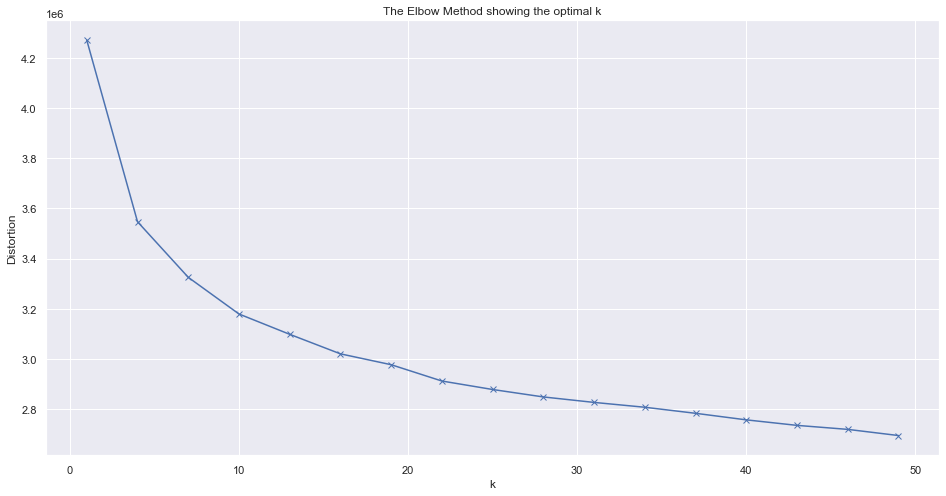

In [234]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [207]:
k_means_4=KMeans(n_clusters=18,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=42, copy_x=True, algorithm='auto')
k_means_4.fit(df_total)
df_total['Cluster'] = k_means_4.predict(df_total)


In [225]:
df_total['Cluster'].value_counts()
images_print = {}
n=0
for i in df_total['Cluster'].value_counts().index:
     if i in [0,5,16]:
          images_print[n]= df_total[df_total['Cluster']==i].sample(5, random_state=1234).index.tolist()
          n = n+1

In [209]:
df_total['Cluster'].value_counts()

6     145
7     131
8     119
14    116
11    106
3     101
15     96
5      89
2      82
4      75
9      66
13     59
17     54
10     52
1      42
16     35
0      30
12     27
Name: Cluster, dtype: int64

In [226]:
images_print

{0: [469, 826, 912, 614, 836],
 1: [369, 789, 449, 86, 243],
 2: [225, 392, 181, 67, 1407]}

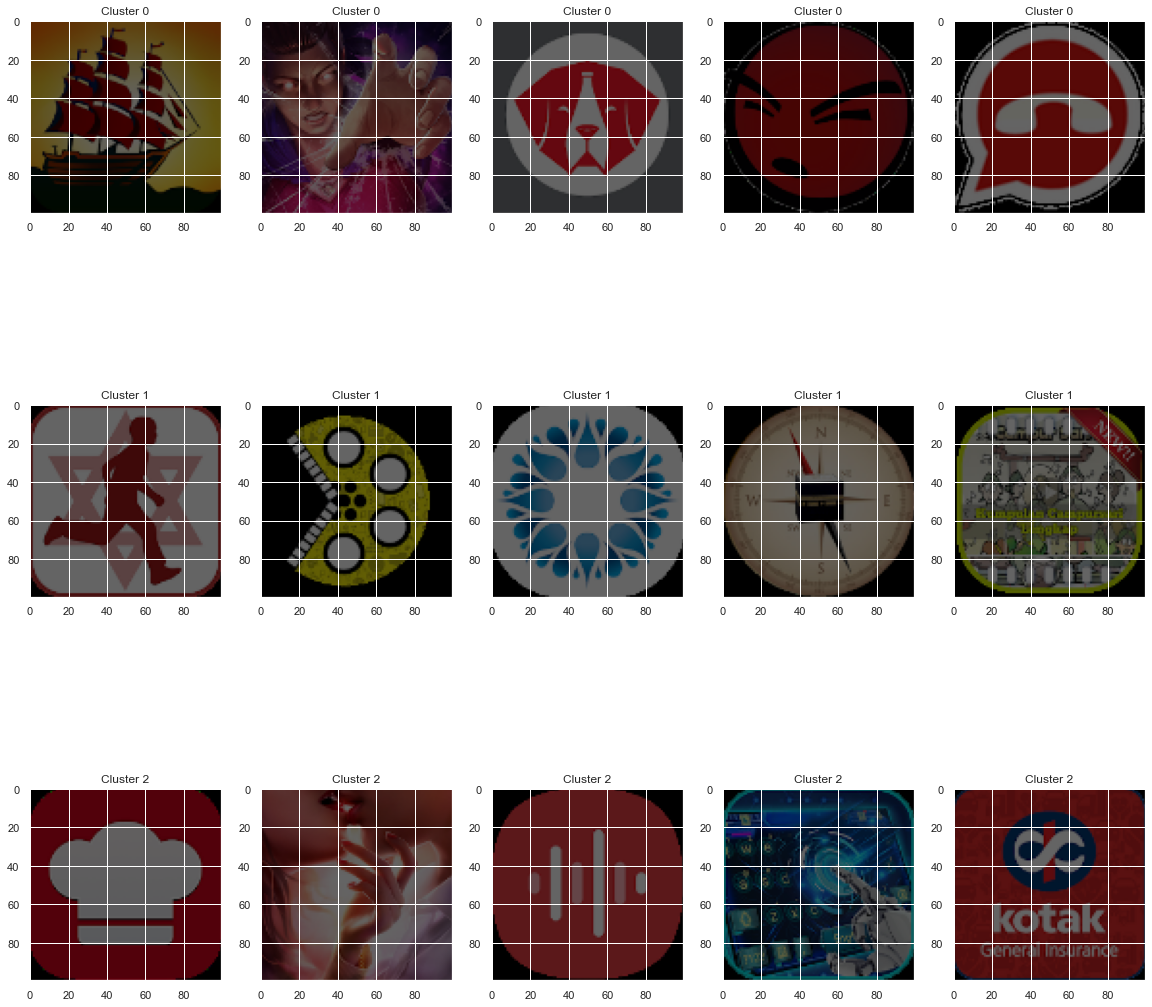

In [228]:
fig = plt.figure(figsize = (20, 20))
plt.subplot()
count=1
for i,j in images_print.items():
        for k,z in enumerate(j):
            aux_var=int(str(4)+str(5)+str(count))
            count=count+1
            plt.subplot2grid((3,5), (i,k))
            #fig.add_subplot(aux_var)
            plt.title(f'Cluster {i}')
            plt.imshow(Image.fromarray(data_complete.iloc[z,69]))

In [59]:
data_w_pca20['cluster']=df_total['Cluster']

In [60]:
table=data_w_pca20.pivot_table(index='cluster',values=['Big_Category2_Education','Big_Category2_Entertainment', 'Big_Category2_Games','Big_Category2_Lifestyle', 'Big_Category2_Tools'],aggfunc='sum',margins=True)
toplot_clusters = pd.DataFrame(table/table.iloc[-1,:])

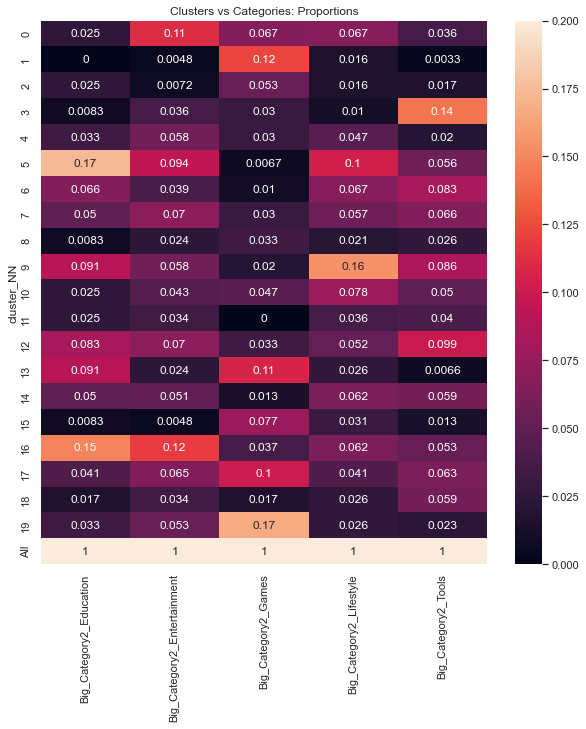

In [230]:
### Existe Algun tipo de correlacion en las variables 

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(toplot_clusters, annot=True, vmin = 0.0, vmax = 0.2)
plt.title('Clusters vs Categories: Proportions')
plt.show()

In [62]:
data_w_pca20.groupby(['cluster']).agg({'Big_Category2_Education':'sum','Big_Category2_Entertainment':'sum', 'Big_Category2_Games':'sum','Big_Category2_Lifestyle':'sum', 'Big_Category2_Tools':'sum'}).reset_index()

,cluster,Big_Category2_Education,Big_Category2_Entertainment,Big_Category2_Games,Big_Category2_Lifestyle,Big_Category2_Tools
0,0,3.00000,21.00000,2.00000,8.00000,9.00000
1,1,6.00000,24.00000,10.00000,17.00000,21.00000
2,2,4.00000,17.00000,3.00000,2.00000,16.00000
3,3,7.00000,43.00000,16.00000,9.00000,15.00000
4,4,2.00000,12.00000,3.00000,8.00000,8.00000
5,5,7.00000,12.00000,14.00000,6.00000,7.00000
6,6,2.00000,22.00000,13.00000,11.00000,18.00000
7,7,4.00000,11.00000,7.00000,2.00000,10.00000
8,8,6.00000,15.00000,23.00000,9.00000,11.00000
9,9,18.00000,35.00000,30.00000,29.00000,27.00000


In [63]:
data_w_pca20['big_category_2']=['Education' if i ==1 else 'Entertaiment' if j==1 else 'Games' if k==1 else 'Lifestyle' if l==1 else 'Tools' if m==1 else 'Business' for i,j,k,l,m in zip(data_w_pca20['Big_Category2_Education'],data_w_pca20['Big_Category2_Entertainment'], data_w_pca20['Big_Category2_Games'],data_w_pca20['Big_Category2_Lifestyle'], data_w_pca20['Big_Category2_Tools'])]

In [64]:
data_w_pca20['big_category_2'].value_counts()

Entertaiment    414
Tools           303
Games           300
Lifestyle       193
Education       121
Business         94
Name: big_category_2, dtype: int64

In [65]:
table_1=data_w_pca20.pivot_table(index='cluster',values=['Rating'],aggfunc='mean',margins=True)

In [66]:
data_w_pca20.columns
data_w_pca20['avg_rating']=[i/j for i,j in zip(data_w_pca20['Rating'],data_w_pca20['Rating Count'])]

<AxesSubplot:>

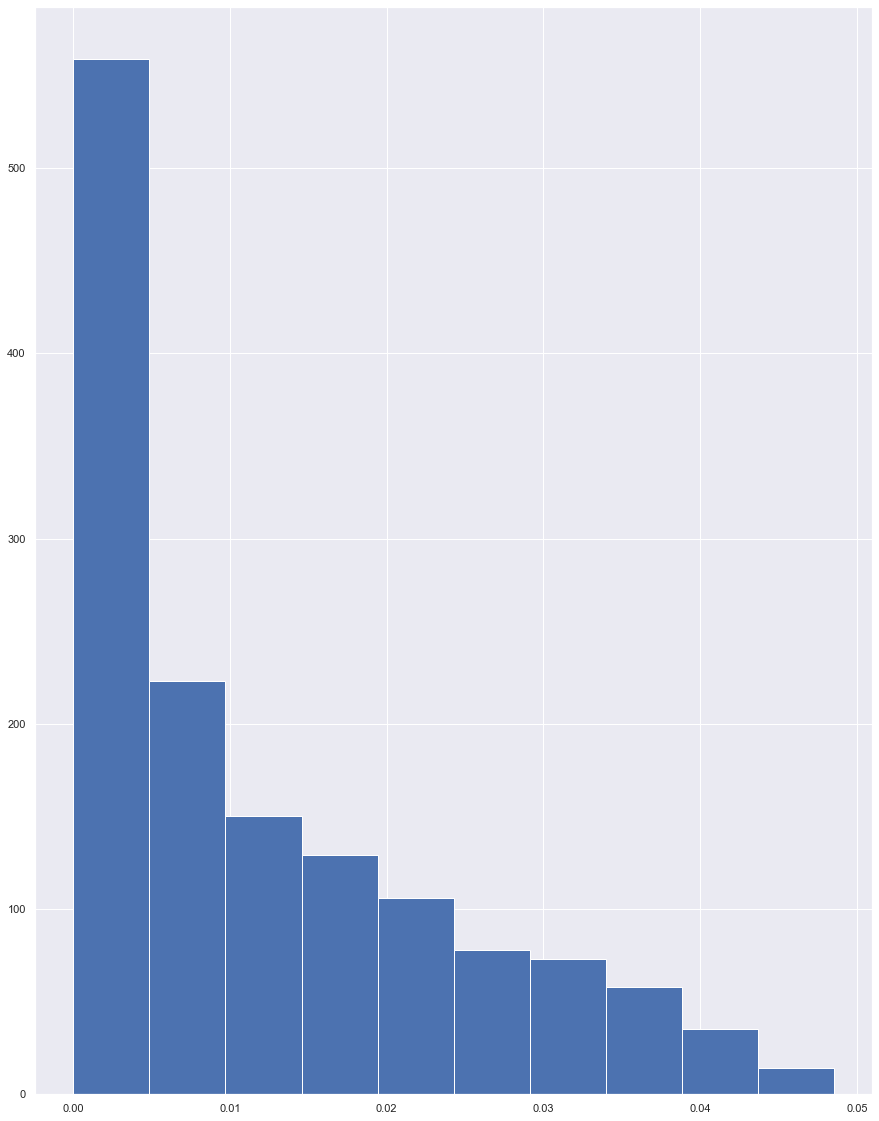

In [67]:
data_w_pca20['avg_rating'].hist()

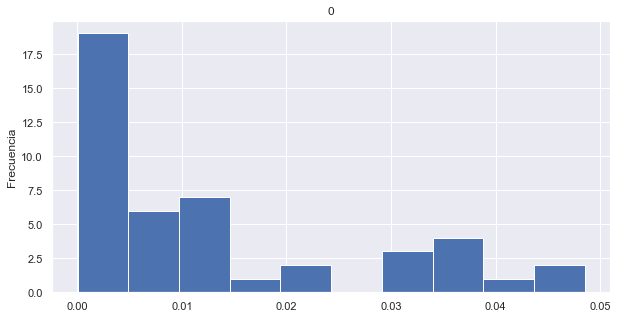

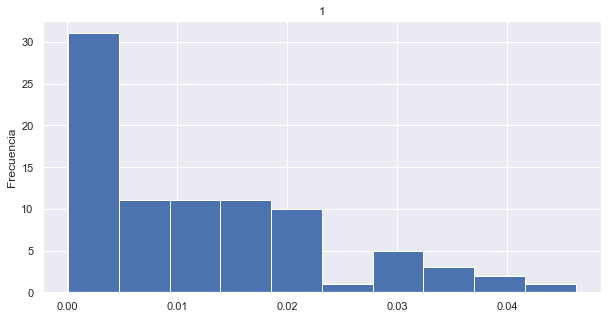

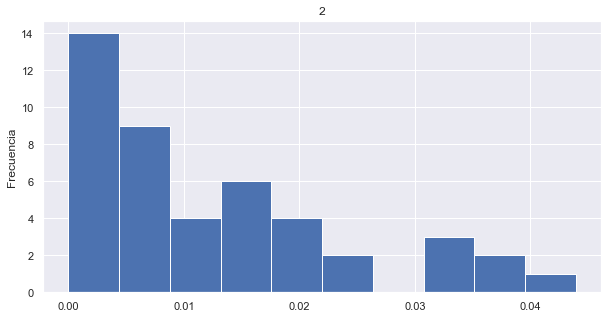

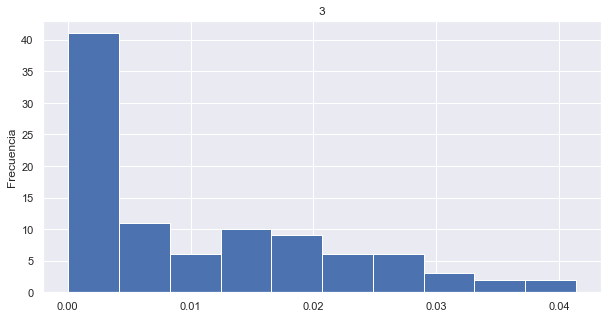

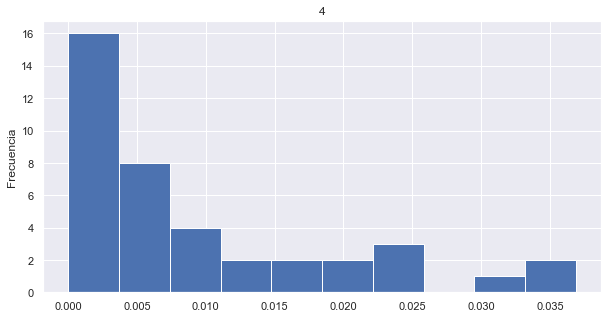

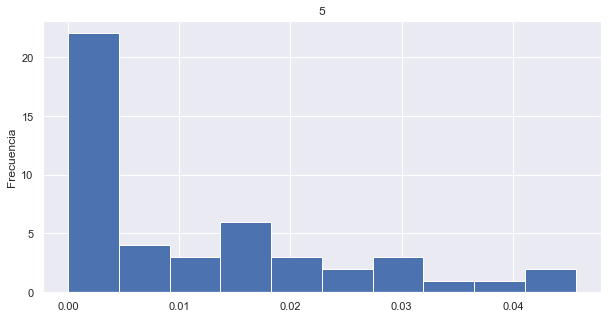

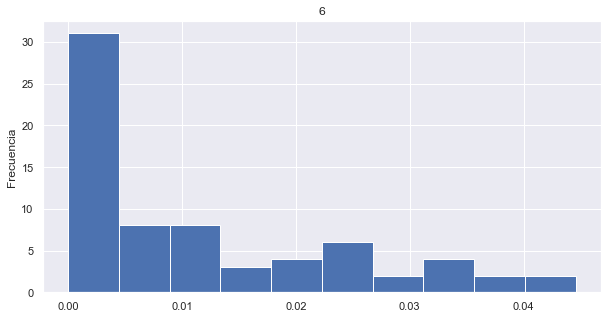

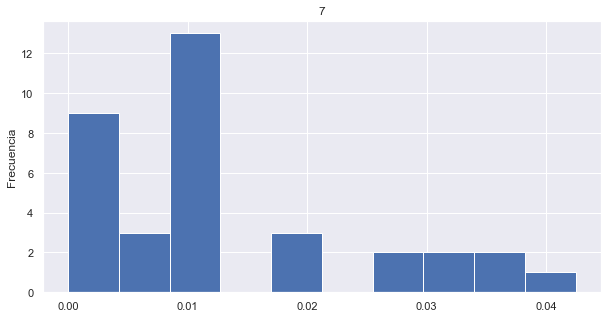

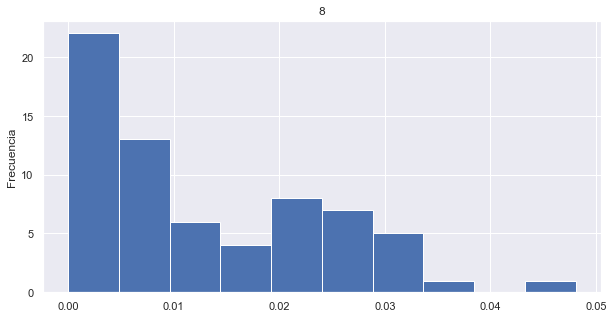

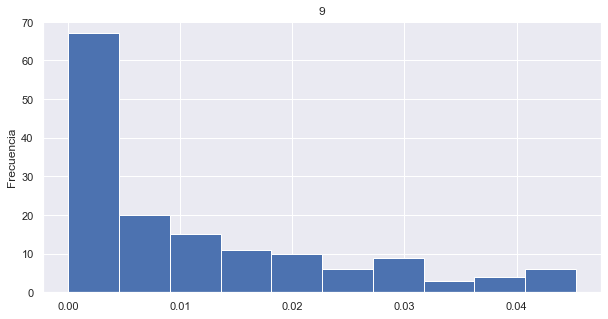

In [68]:
for i in range(10):
    sns.set(rc = {'figure.figsize':(10,5)})
    data_w_pca20[data_w_pca20['cluster']==i]['avg_rating'].hist()
    plt.title(i)
    plt.ylabel('Frecuencia')
    plt.show()
    plt.show()

In [69]:
data_train = data_w_pca20.drop(['App Name', 'App',
       'original_image', 'blue_channel', 'green_channel', 'red_channel',
       'red_channel_scaled', 'blue_channel_scaled', 'green_channel_scaled',
       'blue_channel_PCA', 'green_channel_PCA', 'red_channel_PCA',
       'big_category_2', 'avg_rating','cluster','Rating','Rating Count'], axis = 1)

In [70]:
data_train = pd.concat([data_train,df_total], axis = 1)

In [71]:
data_train = pd.get_dummies(data_train, prefix=['Cluster'], columns=['Cluster'], drop_first = True)

In [72]:
### Drop Pixel Variables 
data_train_1=data_train.drop(['g'+str(i) for i in range(0,2000)],axis=1)
data_train_1=data_train_1.drop(['b'+str(i) for i in range(0,2000)],axis=1)
data_train_1=data_train_1.drop(['r'+str(i) for i in range(0,2000)],axis=1)
data_train_1.head()

,Maximum Installs,Price,size_norm,version,time_realise,time_updated,time_realise_update,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Educational,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free_True,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Ad Supported_True,In App Purchases_True,Editors Choice_True,Big_Category2_Education,Big_Category2_Entertainment,Big_Category2_Games,Big_Category2_Lifestyle,Big_Category2_Tools,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17
0,312649.00000,0.00000,24.00000,5.00000,1842.00000,2.00000,1840.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1846446.00000,0.00000,118.00000,5.00000,555.00000,14.00000,541.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,155423.00000,0.00000,3.40000,4.10000,548.00000,252.00000,296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,36807.00000,0.00000,12.00000,4.20000,637.00000,298.00000,339.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,76328.00000,0.00000,11.00000,4.40000,878.00000,664.00000,214.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,

In [73]:
X_train = data_train_1.drop('Maximum Installs', axis = 1)
y_train = data_train_1['Maximum Installs']
y_train_1=pd.DataFrame()
y_train_1['Maximum Installs']=[1 if i>=86534 else 0 for i in y_train]

In [74]:
# Create the interactions 
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_train_1=pd.DataFrame(poly.fit_transform(X_train),columns=poly.get_feature_names(X_train.columns))

In [75]:
### Variable Selection 
from sklearn.feature_selection import mutual_info_classif
### Function to see feature importance and select some if you want 
def selection(data,y,corr_cut):
  ### Calculate Feature Importances
  feature_scores = mutual_info_classif(data, y, random_state=42)
  tabla_seleccion=pd.DataFrame()
  tabla_seleccion['nombres']=data.columns
  tabla_seleccion['scores']=feature_scores
  tabla_seleccion=tabla_seleccion.sort_values('scores',ascending=False).reset_index()
  data=data[tabla_seleccion['nombres']]
  print('aca')
  ### Corrlation Matrix
  mtrx=np.matrix(data.corr())

  final_var=[]
  final_score=[]
  for j,i in enumerate(mtrx):
    diagonal=i[0,0:j].tolist()[0]
    condition=[True if (i>=corr_cut) or (i<=-(corr_cut)) else False for i in diagonal]
    if any(condition):
      a=1
    else: 
      final_var.append(data.columns[j])
      final_score.append(tabla_seleccion['scores'][j])
  tabla_seleccion_final=pd.DataFrame()
  tabla_seleccion_final['nombres']=final_var
  tabla_seleccion_final['scores']=final_score

  return (tabla_seleccion,tabla_seleccion_final)

In [76]:
a,b=selection(X_train_1,y_train_1,0.4)

/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


aca


In [77]:
### New Data Without Correlation 
new_data=X_train_1[b.nombres]
new_data.shape

(1425, 2232)

In [78]:
#L1 with PCAx3-Kmeans and correlated variable selection

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l1',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(new_data.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(new_data))
    X_scaled.columns=new_data.columns
    for train_index, test_index in skf.split(new_data, y_train_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_1.iloc[train_index], y_train_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('Coef !=0 '+str(sum(log.coef_[0]!=0)))
    print(x_train_fold.columns[log.coef_[0]!=0])
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
Coef !=0 90
Index(['time_realise_update Ad Supported_True',
       'Category_Books & Reference Cluster_16',
       'size_norm Big_Category2_Games', 'size_norm time_realise_update',
       'Category_Music & Audio Big_Category2_Entertainment',
       'Category_Medical Cluster_3', 'version time_updated',
       'Category_Music & Audio Cluster_14', 'Category_Role Playing Cluster_1',
       'version Category_Education', 'Free_True Big_Category2_Tools',
       'Category_Business Cluster_12', 'version Category_Role Playing',
       'Category_Productivity Cluster_6', 'Category_Arcade Cluster_14',
       'Content Rating_Mature 17+ In App Purchases_True',
       'time_realise_update In App Purchases_True',
       'size_norm Category_Personalization', 'Category_Photography',
       'Category_Books & Reference Cluster_17',
       'Content Rating_Everyone 10+ Cluster_6', 'Ad Supported_True Cluster_1',
       'time_updated Category_Tools', 'Category_Productivity Cluster_3',
       'Cate

In [79]:
#L2 with PCAx3-Kmeans and correlated variable selection

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l2',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(new_data.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(new_data))
    X_scaled.columns=new_data.columns
    for train_index, test_index in skf.split(new_data, y_train_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_1.iloc[train_index], y_train_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
CV BIC: 2534.383454234821
CV AUC:0.6507769622429412
Lambda: 0.15
CV BIC: 2534.466002067951
CV AUC:0.6479082633516278
Lambda: 0.25
CV BIC: 2534.466741724521
CV AUC:0.6463380832727192
Lambda: 0.35
CV BIC: 2534.457107780155
CV AUC:0.6457517798496771
Lambda: 0.45
CV BIC: 2534.444469571624
CV AUC:0.6452417950582997
Lambda: 0.55
CV BIC: 2534.4317065181863
CV AUC:0.6447320857854483
Lambda: 0.65
CV BIC: 2534.419617256226
CV AUC:0.6444582203707377
Lambda: 0.75
CV BIC: 2534.408298514417
CV AUC:0.6440457691375168
Lambda: 0.85
CV BIC: 2534.397760003349
CV AUC:0.6437903634640392
Lambda: 0.95
CV BIC: 2534.3880662602423
CV AUC:0.643495834159889


In [80]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(i, model):
    # Read image from dataframe
    image = str(i)+str('.png')
    img = load_img(f'/Users/agustinferreira/Desktop/finalproyect-stats/data/images/{image}', target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

2021-12-21 11:04:28.396797: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
data = {}
error = []
images = data_complete['App']

# lop through each image in the dataset
for i in images:
    # try to extract the features and update the dictionary
    #try:
    feat = extract_features(i,model)
    data[i] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    #except:
        #error.append(i)
          
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape


/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(1425, 1, 4096)

In [82]:
#reshape so that there are 1425 samples of 4096 vectors
feat1 = feat.reshape(-1,4096)
feat1.shape

(1425, 4096)

In [238]:
pcafeat = PCA(n_components=0.95, random_state=22)
pcafeat.fit(feat1)
feat_pca = pcafeat.transform(feat1)

In [239]:
feat_pca.shape

(1425, 661)

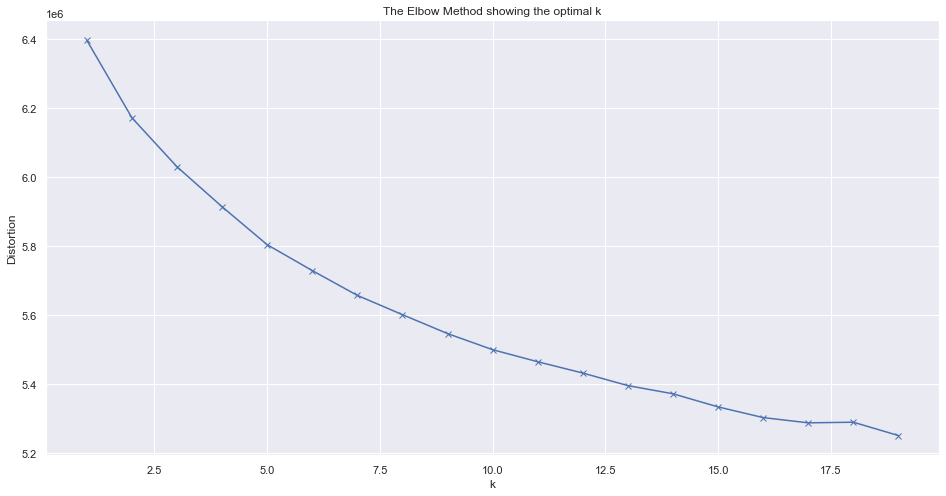

In [266]:
### Train a K means Segmentation 
from sklearn.cluster import KMeans
K = range(1,20)
distortions = []
for k in K:
    k_means=KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=55, copy_x=True, algorithm='auto')
    k_means.fit(feat_pca)
    distortions.append(k_means.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

k_means_feat=KMeans(n_clusters=15,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=55, copy_x=True, algorithm='auto')
k_means_feat.fit(feat_pca)
df_total['Cluster_NN'] = k_means_feat.predict(feat_pca)


In [268]:
df_total['Cluster_NN'].value_counts()

12    148
4     142
8     133
10    126
2     123
14    117
7     114
3     109
1      82
11     78
9      70
6      70
0      59
13     34
5      20
Name: Cluster_NN, dtype: int64

In [281]:
df_total['Cluster_NN'].value_counts()
images_print = {}
n=0
for i in df_total['Cluster_NN'].value_counts().index:
     if i in [5,14]:
          images_print[n]= df_total[df_total['Cluster_NN']==i].sample(5, random_state=1234).index.tolist()
          n = n+1

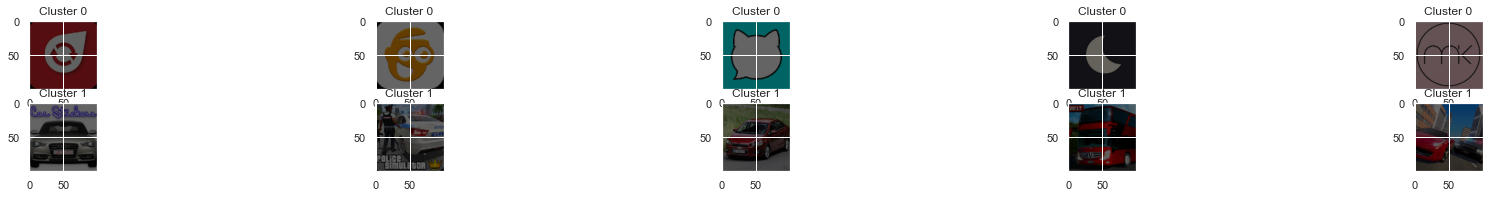

In [282]:
fig = plt.figure(figsize = (30, 30))
plt.subplot()
count=1
for i,j in images_print.items():
        for k,z in enumerate(j):
            aux_var=int(str(4)+str(5)+str(count))
            count=count+1
            plt.subplot2grid((20,5), (i,k))
            #fig.add_subplot(aux_var)
            plt.title(f'Cluster {i}')
            plt.imshow(Image.fromarray(data_complete.iloc[z,69]))

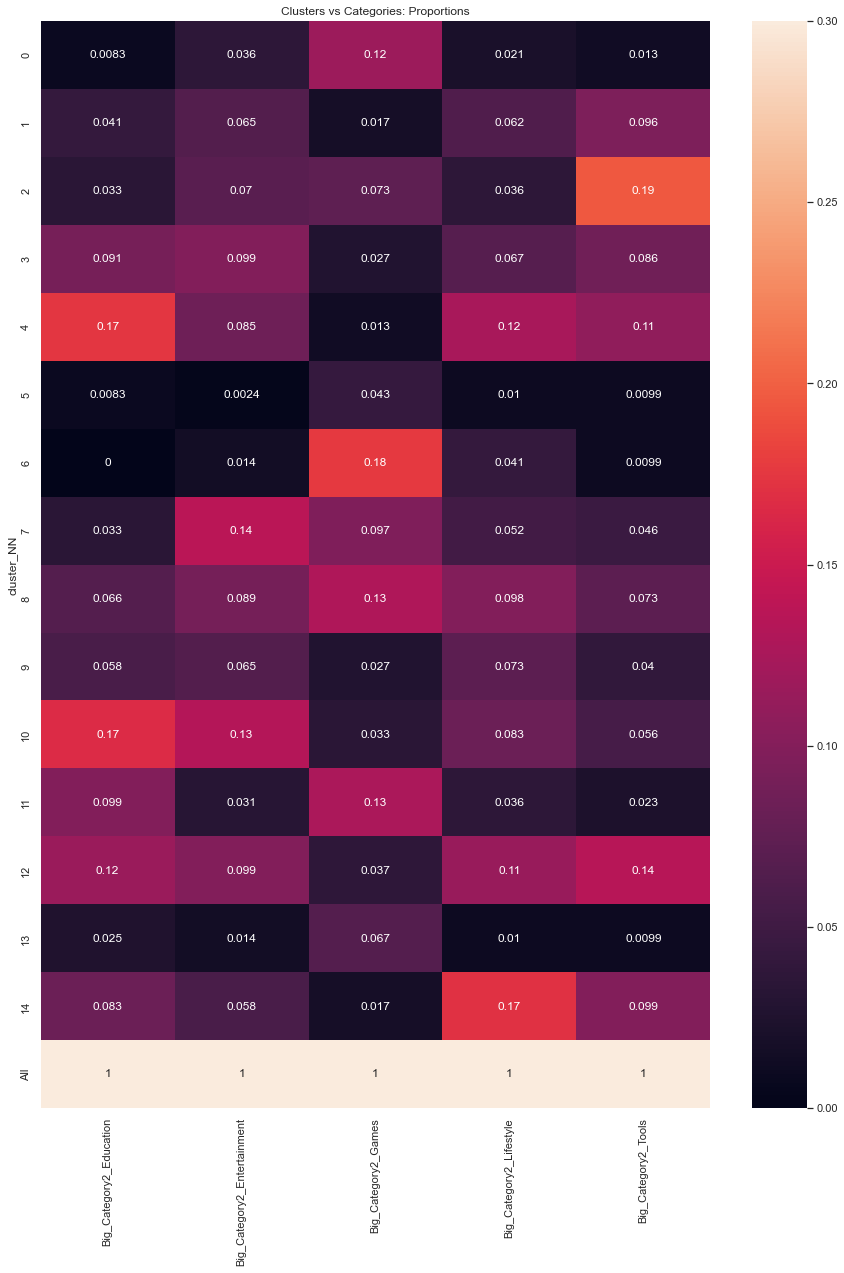

In [243]:
data_w_pca20['cluster_NN']=df_total['Cluster_NN']
table=data_w_pca20.pivot_table(index='cluster_NN',values=['Big_Category2_Education','Big_Category2_Entertainment', 'Big_Category2_Games','Big_Category2_Lifestyle', 'Big_Category2_Tools'],aggfunc='sum',margins=True)
toplot_clusters = pd.DataFrame(table/table.iloc[-1,:])

### Existe Algun tipo de correlacion en las variables 

sns.set(rc = {'figure.figsize':(15,20)})
sns.heatmap(toplot_clusters, annot=True, vmin = 0.0, vmax = 0.3)
plt.title('Clusters vs Categories: Proportions')
plt.show()

In [244]:
df_total['Cluster_NN'].value_counts()

12    148
4     142
8     133
10    126
2     123
14    117
7     114
3     109
1      82
11     78
9      70
6      70
0      59
13     34
5      20
Name: Cluster_NN, dtype: int64

Solo Clusters + Interacciones - Redes Neuronales

In [245]:
data_train_NN = pd.concat([data_w_pca20,df_total], axis = 1)
data_train_NN = pd.get_dummies(data_train_NN, prefix=['cluster_NN'], columns=['cluster_NN'], drop_first = True)
#data_train = data_train[data_train['Big_Category2_Games']==1]

In [247]:
data_train_NN = data_train_NN.drop(['App Name', 'App',
       'original_image', 'blue_channel', 'green_channel', 'red_channel',
       'red_channel_scaled', 'blue_channel_scaled', 'green_channel_scaled',
       'blue_channel_PCA', 'green_channel_PCA', 'red_channel_PCA',
       'big_category_2', 'avg_rating','cluster','Rating','Rating Count','cluster','Cluster'], axis = 1)

In [248]:
### Drop Pixel Variables 
data_train_1=data_train_NN.drop(['g'+str(i) for i in range(0,2000)],axis=1)
data_train_1=data_train_1.drop(['b'+str(i) for i in range(0,2000)],axis=1)
data_train_1=data_train_1.drop(['r'+str(i) for i in range(0,2000)],axis=1)
data_train_1.head()

,Maximum Installs,Price,size_norm,version,time_realise,time_updated,time_realise_update,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Educational,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free_True,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Ad Supported_True,In App Purchases_True,Editors Choice_True,Big_Category2_Education,Big_Category2_Entertainment,Big_Category2_Games,Big_Category2_Lifestyle,Big_Category2_Tools,Cluster_NN,cluster_NN_1,cluster_NN_2,cluster_NN_3,cluster_NN_4,cluster_NN_5,cluster_NN_6,cluster_NN_7,cluster_NN_8,cluster_NN_9,cluster_NN_10,cluster_NN_11,cluster_NN_12,cluster_NN_13,cluster_NN_14
0,312649.00000,0.00000,24.00000,5.00000,1842.00000,2.00000,1840.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1846446.00000,0.00000,118.00000,5.00000,555.00000,14.00000,541.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,155423.00000,0.00000,3.40000,4.10000,548.00000,252.00000,296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,36807.00000,0.00000,12.00000,4.20000,637.00000,298.00000,339.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,76328.00000,0.00000,11.00000,4.40000,878.00000,664.00000,214.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [249]:
X_train = data_train_1.drop('Maximum Installs', axis = 1)
y_train = data_train_1['Maximum Installs']
y_train_1=pd.DataFrame()
y_train_1['Maximum Installs']=[1 if i>=86534 else 0 for i in y_train]

In [250]:
# Create the interactions 
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_train_1=pd.DataFrame(poly.fit_transform(X_train),columns=poly.get_feature_names(X_train.columns))

In [251]:
a,b=selection(X_train_1,y_train_1,0.4)

/Users/agustinferreira/Desktop/finalproyect-stats/env-stats/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


aca


In [252]:
### New Data Without Correlationed Variables
new_data=X_train_1[b.nombres]
new_data.shape

(1425, 2056)

In [253]:
#L1 with AUC and BIC for model selection

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l1',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(new_data.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(new_data))
    X_scaled.columns=new_data.columns
    for train_index, test_index in skf.split(new_data, y_train_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_1.iloc[train_index], y_train_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('Coef !=0 '+str(sum(log.coef_[0]!=0)))
    print(x_train_fold.columns[log.coef_[0]!=0])
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
Coef !=0 69
Index(['Free_True cluster_NN_6', 'Free_True Ad Supported_True',
       'size_norm Cluster_NN', 'Ad Supported_True cluster_NN_14',
       'time_updated Category_Music',
       'time_realise_update In App Purchases_True',
       'time_realise_update Big_Category2_Games', 'version time_updated',
       'version Category_Books & Reference',
       'Content Rating_Mature 17+ Big_Category2_Games',
       'time_realise_update Content Rating_Mature 17+',
       'size_norm Big_Category2_Tools',
       'Category_Simulation Ad Supported_True',
       'Category_Auto & Vehicles Free_True',
       'Category_Role Playing cluster_NN_2',
       'Category_Adventure cluster_NN_13',
       'Category_Personalization cluster_NN_13',
       'Category_Productivity cluster_NN_2',
       'Category_Video Players & Editors In App Purchases_True',
       'Category_Card cluster_NN_11', 'time_realise_update Category_Medical',
       'Category_Music & Audio Cluster_NN', 'time_updated Category

In [254]:
#L2 with AUC and BIC for model selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l2',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(new_data.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(new_data))
    X_scaled.columns=new_data.columns
    for train_index, test_index in skf.split(new_data, y_train_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_1.iloc[train_index], y_train_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
CV BIC: 1855.709821170679
CV AUC:0.6332465449976856
Lambda: 0.15
CV BIC: 1855.651480099384
CV AUC:0.6286602636161256
Lambda: 0.25
CV BIC: 1855.639196579413
CV AUC:0.628171218232714
Lambda: 0.35
CV BIC: 1855.641442106774
CV AUC:0.627463686658291
Lambda: 0.45
CV BIC: 1855.647524558029
CV AUC:0.6268534131234984
Lambda: 0.55
CV BIC: 1855.6560272582587
CV AUC:0.6266580704886596
Lambda: 0.65
CV BIC: 1855.664611029825
CV AUC:0.6260111529899272
Lambda: 0.75
CV BIC: 1855.6729687173288
CV AUC:0.6258158103550884
Lambda: 0.85
CV BIC: 1855.6806506085854
CV AUC:0.6255028213097049
Lambda: 0.95
CV BIC: 1855.687857281683
CV AUC:0.6252485177103309


In [255]:
df_total_NN = pd.concat([data_complete,pd.DataFrame(feat_pca)],axis=1)
df_total_NN.reset_index(inplace=True, drop = True)

In [257]:
data_train_NN = df_total_NN.drop(['App Name', 'App',
       'original_image', 'blue_channel', 'green_channel', 'red_channel',
       'red_channel_scaled', 'blue_channel_scaled', 'green_channel_scaled',
       'blue_channel_PCA', 'green_channel_PCA', 'red_channel_PCA',
       'big_category_2', 'avg_rating','cluster','Rating','Rating Count','cluster','cluster_NN'], axis = 1)

In [258]:
X_train_NN = data_train_NN.drop('Maximum Installs', axis = 1)
y_train_NN = data_train_NN['Maximum Installs']
y_train_NN_1=pd.DataFrame()
y_train_NN_1['Maximum Installs']=[1 if i>=86534 else 0 for i in y_train]

In [259]:
#L1 Cross-Validation all variables , NO CLUSTER
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l1',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(X_train_NN.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(X_train_NN))
    X_scaled.columns=X_train_NN.columns
    for train_index, test_index in skf.split(X_train_NN, y_train_NN_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_NN_1.iloc[train_index], y_train_NN_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('Coef !=0 '+str(sum(log.coef_[0]!=0)))
    print(x_train_fold.columns[log.coef_[0]!=0])
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
Coef !=0 146
Index([                 'size_norm',        'time_realise_update',
       'Category_Books & Reference',         'Category_Education',
                 'Category_Medical',             'Category_Music',
           'Category_Music & Audio',       'Category_Photography',
            'Category_Role Playing',          'Category_Shopping',
       ...
                                599,                          602,
                                610,                          611,
                                613,                          624,
                                631,                          637,
                                650,                          658],
      dtype='object', length=146)
CV BIC: 680.2172095409751
CV AUC:0.6512065399389344
Lambda: 0.15
Coef !=0 418
Index([                 'size_norm',                    'version',
                     'time_updated',        'time_realise_update',
            'Category_Art & Design',   'Catego

In [260]:
#L2 Cross-Validation all variables, NO CLUSTER

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from math import comb

for i in range(5,100,10):
    ### Cross Validation 
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    lst_accu_stratified = []
    lst_bic_stratified = []
    lst_ebic_stratified = []
    log=LogisticRegression(C=(i/100), penalty='l2',solver='liblinear')
    scaler = StandardScaler() 
    scaler.fit(X_train_NN.fillna(0))
    X_scaled=pd.DataFrame(scaler.transform(X_train_NN))
    X_scaled.columns=X_train_NN.columns
    for train_index, test_index in skf.split(X_train_NN, y_train_NN_1):
        x_train_fold, x_test_fold = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train_NN_1.iloc[train_index], y_train_NN_1.iloc[test_index]

        log.fit(x_train_fold, y_train_fold['Maximum Installs'])
        predict_test=log.predict_proba(x_test_fold)[:,1]
        lst_accu_stratified.append(roc_auc_score(y_test_fold,predict_test))
        lst_bic_stratified.append(-2*sum(predict_test)+(np.log(len(y_train_fold['Maximum Installs']))*sum(log.coef_[0]!=0)))

    print('Lambda: '+str(i/100))
    print('CV BIC: '+str(np.mean(lst_bic_stratified)))
    print('CV AUC:' +str(np.mean(lst_accu_stratified)))

Lambda: 0.05
CV BIC: 5050.4729489664205
CV AUC:0.5586631290087946
Lambda: 0.15
CV BIC: 5050.058165002803
CV AUC:0.5514698913354934
Lambda: 0.25
CV BIC: 5049.040272294022
CV AUC:0.5503912363067294
Lambda: 0.35
CV BIC: 5048.372307263555
CV AUC:0.5488687209327956
Lambda: 0.45
CV BIC: 5047.9740844648395
CV AUC:0.5481884656924332
Lambda: 0.55
CV BIC: 5047.768837625036
CV AUC:0.5484499327734798
Lambda: 0.65
CV BIC: 5047.686227239496
CV AUC:0.5480057969097842
Lambda: 0.75
CV BIC: 5047.667503823995
CV AUC:0.5480935495602725
Lambda: 0.85
CV BIC: 5047.668707886826
CV AUC:0.5477739480702682
Lambda: 0.95
CV BIC: 5047.6672670226135
CV AUC:0.547702726531332


XGBOOST WITHOUT CLUSTERS, JUST SELECTING DATA FROM PREPROCESSING WITH THE NN

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier()

parameters = {'nthread':[1], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.1,0.01], #so called `eta` value
              'max_depth': [2,4,6], #also tried with 8 and 10
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8], #tried 0.5 and 0.3
              'colsample_bytree': [0.3],
              'n_estimators': [100,300,500], #number of trees, also tried with 50
              'missing':[-285], #missing kept equally to age 
              'seed': [1337]}


xg_reg = GridSearchCV(xgb_model,
                      parameters,
                      n_jobs=3, 
                      cv=5,
                      #cv=StratifiedKFold(dtrain['QuoteConversion_Flag'], n_folds=5, shuffle=True), 
                      scoring='roc_auc',
                      verbose=3)


xg_reg.fit(X_train_NN,y_train_NN)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=11, missing=-285, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=1337, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=1337, silent=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, ...) 
              
              0.6762434748350242

XGBOOST INCLUDING CLUSTERS WITH DATA FROM PREPROCESSING WITH THE NN

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier()

parameters = {'nthread':[1], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.1,0.01], #so called `eta` value
              'max_depth': [2,4,6], #also tried with 8 and 10
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8], #tried 0.5 and 0.3
              'colsample_bytree': [0.3],
              'n_estimators': [100,300,500], #number of trees, also tried with 50
              'missing':[-285], #missing kept equally to age 
              'seed': [1337]}


xg_reg_clusters = GridSearchCV(xgb_model,
                      parameters,
                      n_jobs=3, 
                      cv=5,
                      #cv=StratifiedKFold(dtrain['QuoteConversion_Flag'], n_folds=5, shuffle=True), 
                      scoring='roc_auc',
                      verbose=3)


xg_reg_clusters.fit(X_train_1,y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=11, missing=-285, monotone_constraints='()',
              n_estimators=300, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=1337, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=1337, silent=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, ...)

              0.7105486063232542